In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [12]:
def skin(src):
    '''
    
    Dest = Src * (1-Opacity) + (Src + 2 * GuassianBlur(EPFFilter(Src) - Src +128))
    
    '''
    dst = np.zeros_like(src)
    #int value1 = 3, value2 = 1, 分别为磨皮程度和细节程度
    v1 = 3
    v2 = 1
    dx = v1 * 5
    fc = v1 * 12.5 # parameters of bilateral filter
    p = 0.1
    
    temp4 = np.zeros_like(src)
    
    temp1 = cv2.bilateralFilter(src,dx,fc,fc)
    temp2 = cv2.subtract(temp1,src)
    temp2 = cv2.add(temp2,(10,10,10,128))
    temp3 = cv2.GaussianBlur(temp2,(2*v2-1,2*v2-1),0)
    temp4 = cv2.subtract(cv2.add(cv2.add(temp3,temp3),src),(10,10,10,255))
    
    dst = cv2.addWeighted(src,p,temp4,1-p,0.0)
    dst = cv2.add(dst,(10,10,10,255))
    return dst

In [13]:
face_ori = cv2.imread('skin.jpg',1)
face_process = skin(face_ori)

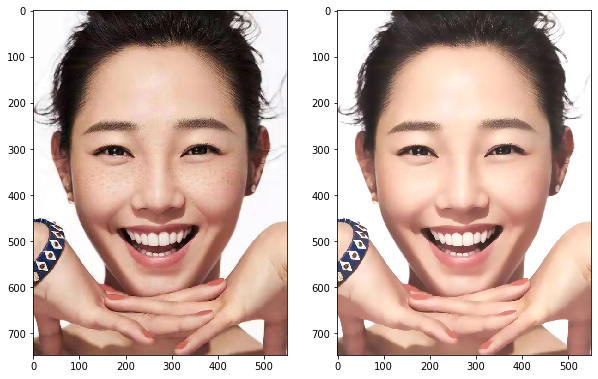

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(face_ori,cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(face_process,cv2.COLOR_BGR2RGB))

# linear regression， Written in numpy

In [2]:
import numpy as np
import random
import time

In [3]:
#inference, predict y
def inference(w,b,x):
    pred_y = w*x - b
    return pred_y

In [98]:
# cost function
#assume data = np.array([[x1,y2],[x2,y2].....])
def eval_loss(w,b,data):
    avg_loss = 0
    for i in range(len(data[:,0])):
        avg_loss += (w*data[i,0] - b - data[i,1])**2
    avg_loss /= len(data[:,1])
    return avg_loss
    

In [99]:
k = np.array([[1,2,3],[4,5,6]])
print(k[:,0])
print(len(k[0]))
print(len(k))
print(len(k[:,2]))

[1 4]
3
2
2


In [100]:
# gradient calculated from single sample
def gradient(pred_y,gt_y,x):
    diff = pred_y - gt_y
    dw = diff*x
    db = diff
    return dw,db

In [101]:
# batch size refreshes w & b
# 补充，以后还会有mini-batch随机梯度下降
def cal_step_gradient(batch_x_list,batch_y_list,w,b,lr):# lr is alpha, learning rate
    avg_dw, avg_db = 0,0
    batch_size = len(batch_x_list)
    for i in range(batch_size):
        pred_y = inference(w,b,batch_x_list[i])
        dw,db = gradient(pred_y,batch_y_list[i],batch_x_list[i])
        avg_dw += dw
        avg_db += db
    avg_dw /= batch_size
    avg_db /= batch_size
    w -= lr*avg_dw
    b -= lr*avg_db
    return w,b

In [102]:
def gen_sample_data():
    w = random.randint(0,10) + random.random()
    b = random.randint(0,5) + random.random()
    
    num_sample = 100
    x_list = []
    y_list = []
    print(w,b)
    for i in range(num_sample):
        x = random.randint(0,100)*random.random()
        y = w * x + b + random.randint(-1,100) * random.random()
        x_list.append(x)
        y_list.append(y)
    data = np.array([np.array(x_list),np.array(y_list)])
    data = data.T
    return data

1.1038190196818052 2.2511654090118087


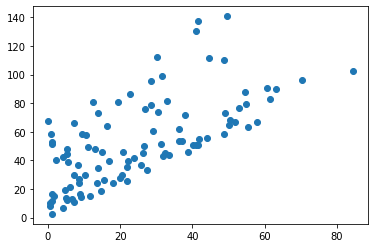

In [118]:
data = gen_sample_data()
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.show()

In [119]:
xlist = [0,1,2]
ylist = [3,4,5]
a = np.array([xlist,ylist])
a = a.T
print(a[1,0])
print(a)

1
[[0 3]
 [1 4]
 [2 5]]


In [120]:
def train(data, batch_size, lr, max_iter):
    w = 0
    b = 0
    num_samples = int(len(data[:,1]))
    for i in range(max_iter):

        batch_idxs = np.random.choice(num_samples,batch_size)#the random in numpy
        batch_x = [data[j,0] for j in batch_idxs]
        batch_y = [data[j,1] for j in batch_idxs]
        
        w,b = cal_step_gradient(batch_x,batch_y,w,b,lr)
        print('w:{0},b:{1}'.format(w,b))
        print('loss is {}'.format(eval_loss(w,b,data)))
        time.sleep(0.1)
    return w,b
    

In [121]:
wt,bt = train(data, 100, 0.001, 100)

w:1.7547745059804407,b:0.051173114713615374
loss is 767.8912624718486
w:1.8102912846357426,b:0.06378333570814164
loss is 774.3406368203508
w:1.5769765574888799,b:0.06905729396822258
loss is 789.4902385408296
w:1.8075309407730211,b:0.08476016373187158
loss is 774.2183122067403
w:1.7824086500170884,b:0.09537708940019005
loss is 770.9928024621336
w:1.852575378431972,b:0.10517230516116921
loss is 783.7380669809005
w:1.8587277390228465,b:0.11520354812149494
loss is 785.4399655515937
w:1.6753727165797951,b:0.1209959702982421
loss is 771.1370584766868
w:1.9346646962734146,b:0.13632675124472127
loss is 811.1437396578683
w:1.74745048216151,b:0.1405277333497411
loss is 769.2058114386225
w:1.7664981982681565,b:0.15238928104586824
loss is 770.5137801569715
w:1.553754965795975,b:0.15944029102914156
loss is 799.4776425986373
w:1.7346682150979917,b:0.17198885422662386
loss is 769.4911534710691
w:1.5685643842951165,b:0.17884997137463288
loss is 795.1054874279382
w:1.870526953411022,b:0.196844183032200

In [122]:
num_samples = int(len(data[:,1]))
num_samples

100

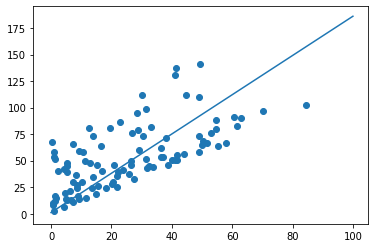

In [123]:
x = np.arange(0, 100, 0.1)
y = wt*x + bt
plt.figure()
plt.plot(x,y)
plt.scatter(data[:,0],data[:,1])
plt.show()